# Module 1 - multiple regression

## Learning goals:

For a multivariable linear regression, students will be able to:

* compare and contrast with univariable linear regression
* write an example of the equation
* develop one with statsmodels 
* assess the model fit 
* validate the model


### Keyterms
- Multivariable
- Train-test split
- MSE: Mean squared error
- RSME: Root squared mean error


## Scenario

The University of San Paulo in Brazil is likes to party. We are a contracted beer supplier to the University and we want to make sure we have enough supply on hand. We are hoping to build a model that can predict beer consumption given other variables. 


![beer](pexels-photo-544988-small.jpeg)
More about the dataset can be found [here](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)


###  Activation: Prior Knowledge


Before looking at the dataset, what variables do we think might be in there? What might make a student drink more? 

#### Step 1:  Discussion 

- compare and contrast with univariable linear regression
- How is this different from the regression we've done before?
- Here, you'll explore how to perform linear regressions using multiple independent variables to better predict a target variable.

#### Step 2:  Develop a multivariable regression model with statsmodels 

**Load Libraries and load in data**

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumo_cerveja.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


### Small Data Cleaning Tasks:
- Drop Date
- convert all the columns to numeric (replace ',' with '.')
- rename columns to be `name = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']`

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.


**Drop** the date column:

In [11]:
df.head(20)

,temp-median,tempmin,tempmax,rain,weekend,target
0,27.3,23.9,32.5,0,0.0,25.461
1,27.02,24.5,33.5,0,0.0,28.972
2,24.82,22.4,29.9,0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21,28.3,0,0.0,28.900
5,23.78,20.1,30.5,12.2,0.0,28.218
6,24,19.5,33.7,0,0.0,29.732
7,24.9,19.5,32.8,48.6,0.0,28.397
8,28.2,21.9,34,4.4,0.0,24.886
9,26.76,22.1,34.2,0,1.0,37.937


In [9]:
# drop date column
#df = df.drop(['Data'], axis =1)
# rename columns
name = ['temp-median', 'tempmin', 'tempmax', 'rain', 'weekend', 'target']
df.columns = name

**Convert** strings to numbers

**First** - fix the punctuation

In [12]:
# talk them through doing it for one column, then have them convert it to a for-loop
for colname in ['temp-median', 'tempmin', 'tempmax', 'rain']:
    df[colname] = df[colname].str.replace(',','.')

In [13]:
#have them check that it worked, but still see that they are stored as text rather than numbers
df.head()
#df.info()

,temp-median,tempmin,tempmax,rain,weekend,target
0,27.3,23.9,32.5,0,0.0,25.461
1,27.02,24.5,33.5,0,0.0,28.972
2,24.82,22.4,29.9,0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21,28.3,0,0.0,28.900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
temp-median    365 non-null object
tempmin        365 non-null object
tempmax        365 non-null object
rain           365 non-null object
weekend        365 non-null float64
target         365 non-null float64
dtypes: float64(2), object(4)
memory usage: 44.2+ KB


**Second**: convert to numeric

In [15]:
# guide them through converting the column to a numeric once, then make a for-loop
for colname in ['temp-median', 'tempmin', 'tempmax', 'rain']:
    df[colname] = pd.to_numeric(df[colname])

In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
temp-median    365 non-null float64
tempmin        365 non-null float64
tempmax        365 non-null float64
rain           365 non-null float64
weekend        365 non-null float64
target         365 non-null float64
dtypes: float64(6)
memory usage: 44.2 KB


,temp-median,tempmin,tempmax,rain,weekend,target
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


**Check** for NaNs

In [17]:
df.isna().sum()

temp-median    576
tempmin        576
tempmax        576
rain           576
weekend        576
target         576
dtype: int64

In [18]:
df.shape

(941, 6)

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(365, 6)

### In this dataset what is the difference vs linear regression from before?
#### Discussion here

>

### Everyone write an example of an equation for our multilinear regression

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

What would the formula be with real values?

**Send your equations to me via zoom or slack and I will paste them into the notebook**

Equations here

>

![statsmodels](https://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

Okay, now here's how you can use format and join to make the formula with **code**:

In [ ]:
formula = 'target~{}'.format("+".join(df.columns[:-1]))
formula

In [21]:
df.head()

,temp-median,tempmin,tempmax,rain,weekend,target
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [22]:
x_single = df['tempmax']
x_multi2 = df[['tempmax', 'tempmin']]
x_multiall = df.drop('target', axis = 1)
y = df.target

In [23]:
X = sm.add_constant(x_single[:, np.newaxis])
model = sm.OLS(y, X).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.55e-44
Time:                        14:09:06   Log-Likelihood:                -960.89
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     363   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9749      1.105      7.220      0.000       5.803      10.147
x1             0.6548      0.041     15.982      0.000       0.574       0.735
==============================================================================
Omnibus:                       14.831   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.412
Skew:                           0.371   Prob(JB):                      0.00202
Kurtosis:                       2.486   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y_pred = model.predict(X)

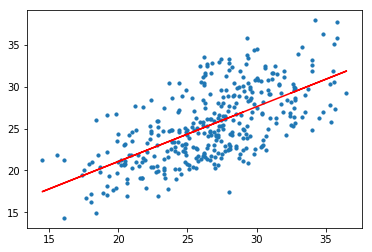

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x_single, y, s=10)
plt.plot(x_single, y_pred, color='r')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     9192.
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.22e-311
Time:                        14:14:18   Log-Likelihood:                -984.14
No. Observations:                 365   AIC:                             1972.
Df Residuals:                     363   BIC:                             1980.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tempmax        0.8624      0.054     15.921      0.0

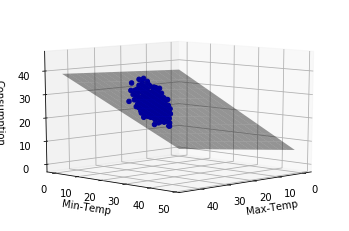

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

#Reassigning variable to preserve original df
csv = df

#fit new model
model2 = sm.OLS(y,x_multi2)
fit = model2.fit()

print(fit.summary())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 50, 5)                # generate a mesh
y_surf = np.arange(0, 50, 3)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'tempmax': x_surf.ravel(), 'tempmin': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['tempmax'], csv['tempmin'], csv['target'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('Max-Temp')
ax.set_ylabel('Min-Temp')
ax.set_zlabel('Consumption')
ax.view_init(10, 45)
plt.show()


_Assess_: 

### What's the actual multivariable  linear regression equation with the coefficients?

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

#### Step 3: Assess the model fit
Demonstrate and Apply:

**Discussion:**

In groups of 2 or 3 write a synopsis of the following summary

* What can you say about the coefficients?
> Some are significant, some are not. Rain decreases the amount drunk, finals week ups it.
* What do the p-values tell us?
> Median and min are not statistically significant
* What does R^2 represent
> That it says it's fit very well - but suspiciously well
* What other insights do you notice?
> I wonder how the residuals and the assumptions turn out



Assess:
- Let group discuss
- review answers


#### Step 4: Validate the model 
![scikit](https://cdn-images-1.medium.com/max/1200/1*-FHtcdQljtGKQGm77uDIyQ.png)
- Build LinReg Model with Scikit-Learn
- Check some of the linear regression assumptions


In [36]:
linreg = LinearRegression()

In [37]:
X = x_single[:, np.newaxis]
y = df.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [42]:
# use fit to form model
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# gives you r squared of the model
linreg.score(X_test, y_test)

0.45171512568101413

`score` here returns the R^2. 

How does it differ from when you use the whole dataset?

STATSMODEL vs SKLEARN

In [50]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dummy data:
y = np.array([1,3,4,5,2,3,4])
X = np.array(range(1,8)).reshape(-1,1) # reshape to column

# scikit-learn:
lr = LinearRegression()
lr.fit(X,y)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
#     normalize=False)

print(lr.score(X,y))
# 0.16118421052631582

y_pred=lr.predict(X)
r2_score(y, y_pred)
# 0.16118421052631582


# statsmodels
# first artificially add intercept to X, as advised in the docs:
X_ = sm.add_constant(X)

model = sm.OLS(y,X_) # X_ here
results = model.fit()
print(results.rsquared)


0.1611842105263156
0.16118421052631615


### Assessment

In [4]:
x = np.random.normal(0, 1, 30)
y = x + 2 * (x**2) + np.random.normal(0, 1, 30)

In [8]:
X = sm.add_constant(x[:, np.newaxis])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     4.363
Date:                Wed, 01 May 2019   Prob (F-statistic):             0.0459
Time:                        15:02:01   Log-Likelihood:                -71.290
No. Observations:                  30   AIC:                             146.6
Df Residuals:                      28   BIC:                             149.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5668      0.492      3.182      0.004       0.558       2.575
x1             1.0904      0.522      2.089      0.046       0.021       2.160
==============================================================================
Omnibus:                       11.312   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.178
Skew:                           1.291   Prob(JB):                      0.00617
Kurtosis:                       4.217   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reflection

### Resources

Resources
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

Full code implementation of Linear Regression
Full code — https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation

Multiple regression explained
https://www.statisticssolutions.com/what-is-multiple-linear-regression/
